## **Part 4. 시각화 도구**
### Matplotlib | 기본 그래프 도구
- 판다스도 데이터 시각화를 제공하기는 하지만 불충분함.
- 다양한 2D 평면 그래프를 그릴 수 있는 matplotlib
---
1. 
    그래프
- 연속된데이터 값을을 연결하여 변화와 패턴을 파악하는 2  면적 그래프
   이.
2.
- 색의 투명도 디폴트 
    : 0.5
- 선 그래프를 그리는 plot메서드에 kind='area' 옵션 추가하여 .그릴 수 있음
3프
   - 세로 그래프와 가로 그래프가 있음
   - kind='bar' 이용
4. 히스토그램
   - 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현
   - x축 간격이 같은 구간을 만들고 해당 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시]
   - plot(kind='hist')
5. 산점도 (scatter plot)
   - 서로 다른 두 변수(정수형 or 실수형) 사이의 관계
   - plot(kind='scatter') : 산점도
   - plot(x='weight') : x축에 위치할 변수 선택
6. 파이차트
   - plot(kind='pie')
7. 박스 플롯
   - 범주형 데이터의 분포 파악 면적 그래프

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/population.xlsx",
                  engine = 'openpyxl', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [14]:
# 누락값 NaN을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
# 서울에서 타지역으로 전출하는 데이터만 남음
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
# 전입지별 -> 전입지 (열 방향)
df_seoul.set_index('전입지', inplace=True)
# 전입지 열을 행 인덱스에 지정
df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [15]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
# 명칭 기반 인덱싱
sr_one.head(3)

1970    130149
1971    150313
1972     93333
Name: 경기도, dtype: object

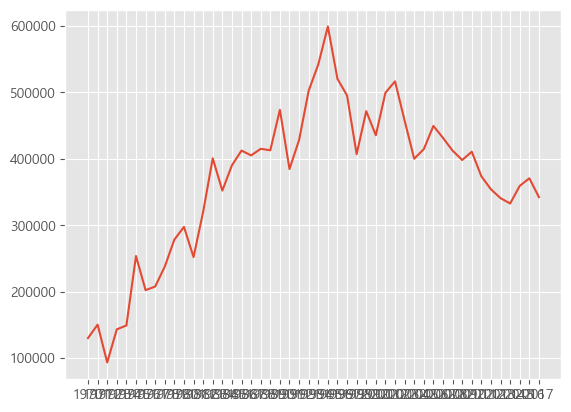

In [16]:
# x,y축 데이터를 plot 함수에 입력 (맷플롯립)
plt.plot(sr_one.index, sr_one.values)

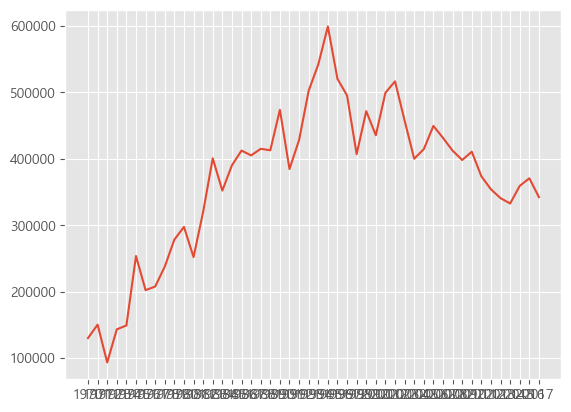

In [17]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

차트 제목, 축 이름 추가

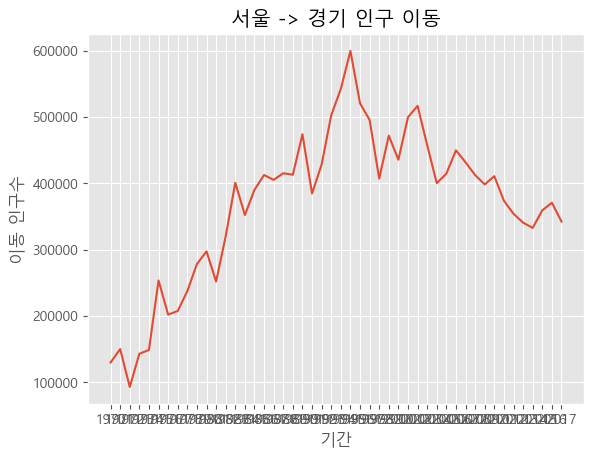

In [18]:
sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')
# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

Matplotlib 한글 폰트 오류 해결

In [19]:
from matplotlib import font_manager, rc
font_path = 'C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

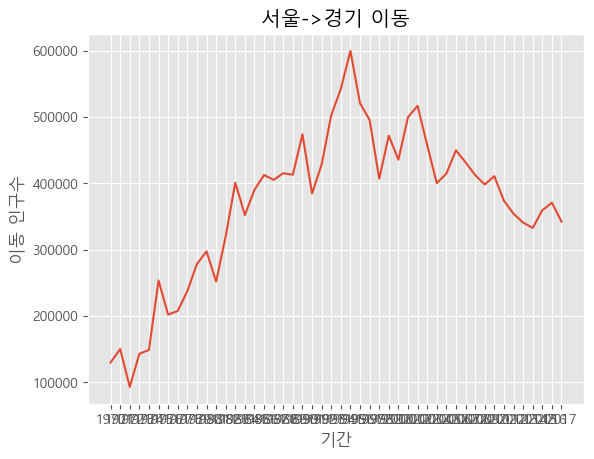

In [20]:
# Excel 데이터를 데이터 프레임으로 변경
plt.plot(sr_one.index, sr_one.values)
plt.title('서울->경기 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

그래프 꾸미기

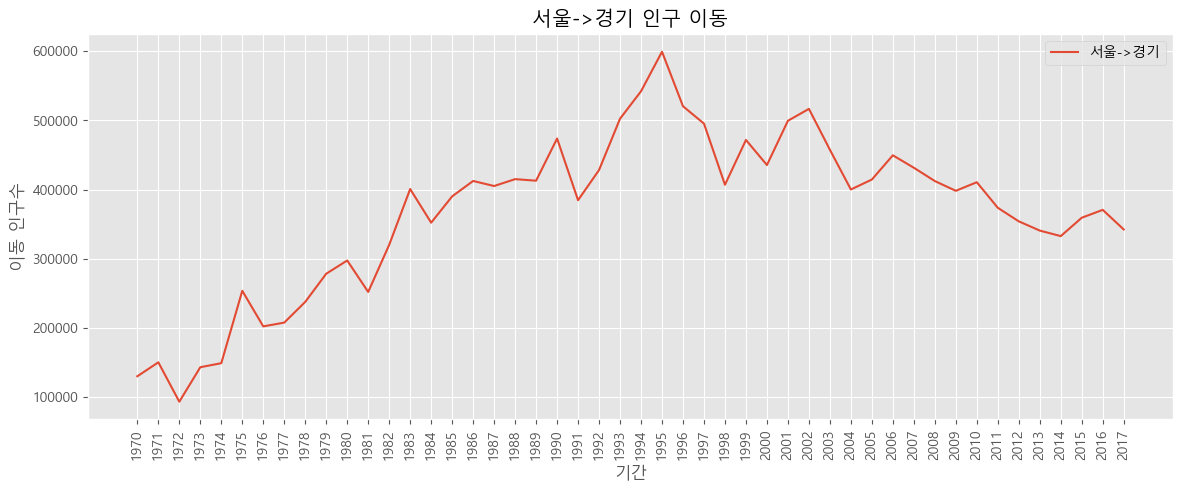

In [21]:
# 그림 사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)
plt.title('서울->경기 인구 이동') # 차트 제목
plt.xlabel('기간') # x축 이름
plt.ylabel('이동 인구수') # y축 이름

plt.legend(labels=['서울->경기'], loc='best')
plt.show()

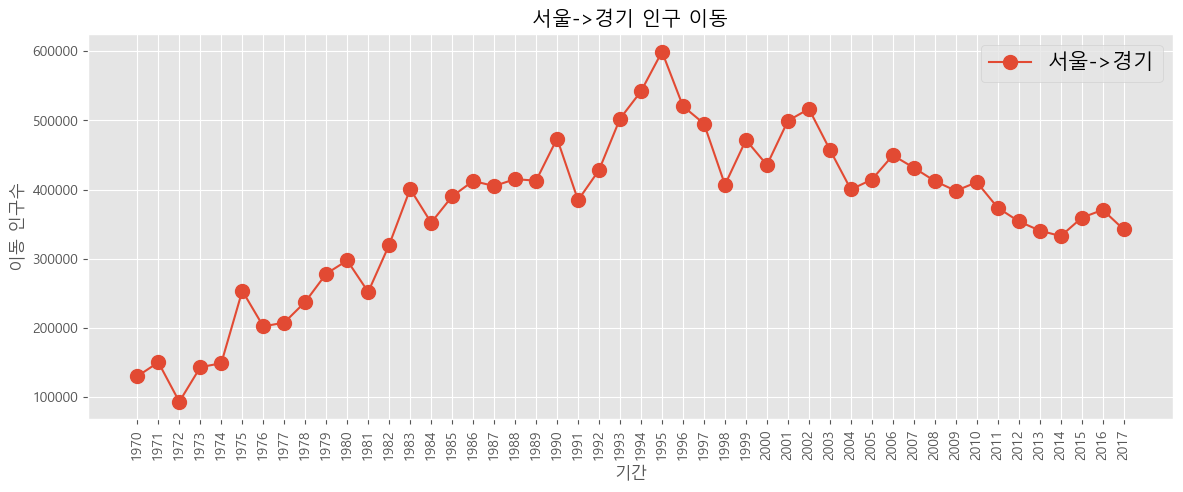

In [22]:
# 스타일 서식 지정
plt.style.use('ggplot')
# 그림 사이즈 지정
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')
# x,y축 데이터를 plot함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
plt.title('서울->경기 인구 이동') # 차트 제목
plt.xlabel('기간') # x축 이름
plt.ylabel('이동 인구수') # y축 이름
plt.legend(labels=['서울->경기'], loc='best', fontsize=15)

plt.show()

Matplotlib 스타일 서식의 종류
- ggplot, classic, bmh, dark_background, fast, grayscale, seaborn 등
- 디폴트 상태로 돌아가려면 스파이더(IDE)를 재실행

In [ ]:
# 스타일 리스트 출력
print(plt.style.available)

주석 : annotate() 함수 사용

In [ ]:
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)
plt.title('서울->경기 인구 이동') # 차트 제목
plt.xlabel('기간') # x축 이름
plt.ylabel('이동 인구수') # y축 이름

plt.legend(labels=['서울->경기'], loc='best')

# y축 범위 지정 (최소, 최대)
plt.ylim(50000, 800000)
# 주석 표시; 화살표
plt.annotate('',
             xy=(20,620000), # 화살표의 머리 부분(끝점)
             xytext=(2,290000), # 화살표의 꼬리 부분(시작점)
             xycoords='data', # 좌표 체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),
            )
plt.annotate('',
             xy=(47,450000),
             xytext=(30,580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),
            )
# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',
             xy=(10,550000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15,
            )
plt.annotate('인구 이동 감소(1995-2017)',
             xy=(40,560000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15,
            )
plt.show()

화면 분할하여 그래프 여러 개 그리기 - axe 객체 사용
- 여러 개의 axe객체를 만들고 분할된 화면마다 axe 객체 하나씩 배정
- 각각 서로 다른 그래프를 표현할 수 있음
- 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줌

In [ ]:
fig = plt.figure(figsize=(10,10)) # 그래프를 그리는 그림틀(가로, 세로)
# add_subplot(행의 크기, 열의 크기, 서브플롯 순서)
ax1 = fig.add_subplot(2,1,1) # 그림틀을 여러 개로 분할. 나뉜 부분이 axe 객체
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10) # 선을 그리지 않고 점으로만
ax2.plot(sr_one, marker='o', markerfacecolor='green', 
         markersize=10, color='olive', linewidth=2, label=('서울->경기'))
ax2.legend(loc='best')

# y축 범위 지정 (최솟값, 최댓값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정과 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

선 그래프의 꾸미기 옵션
- 'o' | 선 그래프가 아니라 점 그래프
- marker='o' | 마커 모양(o, +, *, . 등)
- markerfacecolor | 마커 배경색
- markersize | 마커 크기
- color | 선의 색
- linewidth | 선 두께
- label | 라벨 지정

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange',
        markersize=10, color='olive', linewidth=2,
        label='서울->경기')
ax.legend(loc='best')

# y축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울->경기 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotatin=75)

# 축 눈금 라벨 크기
ax.tick_parama(axis='x', labelsize=10)
ax.tick_parama(axis='y', labelsize=10)

plt.show()

C:\Users\gyw78\AppData\Local\Temp\ipykernel_20136\3499596011.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(col_years, rotation=90)


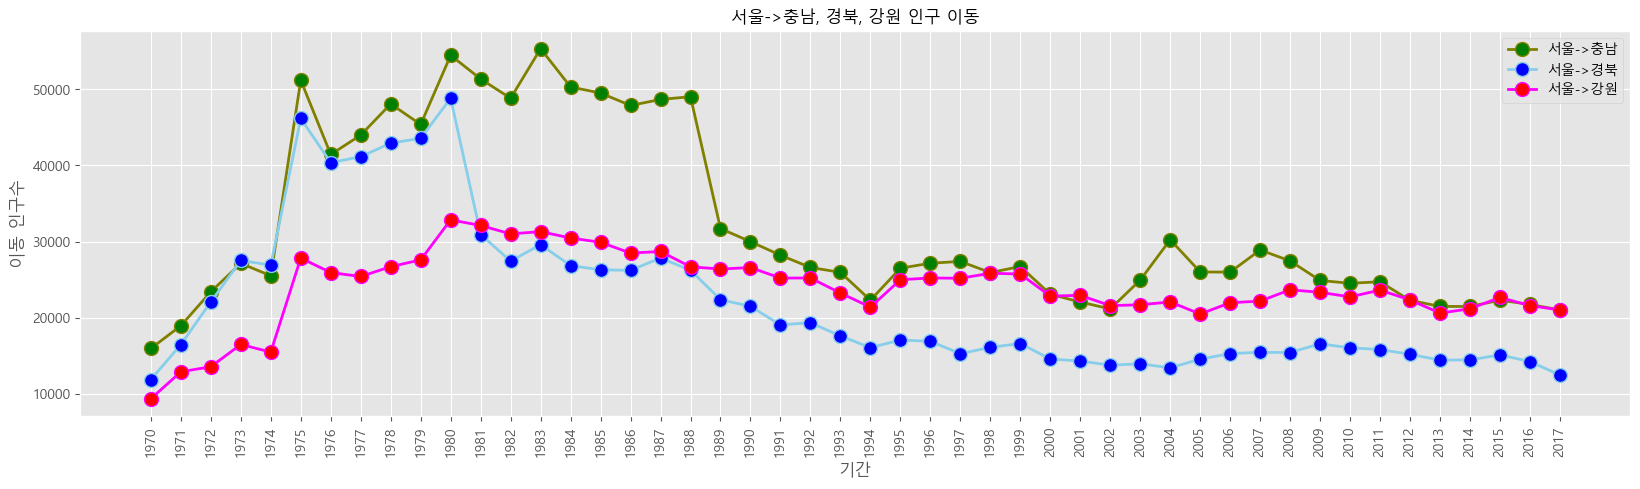

In [31]:
# 동일한 그림(axe객체)에 여러 개의 그래프를 추가하기

# 서울에서 충남, 경북, 강원도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'],col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 하나의 서브 플롯 생성)
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
                            markersize=10, color='olive', linewidth=2, label='서울->충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
                            markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
                            markersize=10, color='magenta', linewidth=2, label='서울->강원')

ax.legend(loc='best')
# 차트 제목 추가
ax.set_title('서울->충남, 경북, 강원 인구 이동', size=12)
# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
# 축 눈금 라벨 지정과 90 도 회전
ax.set_xticklabels(col_years, rotation=90)
# 축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

C:\Users\gyw78\AppData\Local\Temp\ipykernel_20136\3974576193.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\gyw78\AppData\Local\Temp\ipykernel_20136\3974576193.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\gyw78\AppData\Local\Temp\ipykernel_20136\3974576193.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\gyw78\AppData\Local\Temp\ipykernel_20136\3974576193.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(col_years, rotation=90)
C:\Users\gyw78\anaconda3\Lib\sit

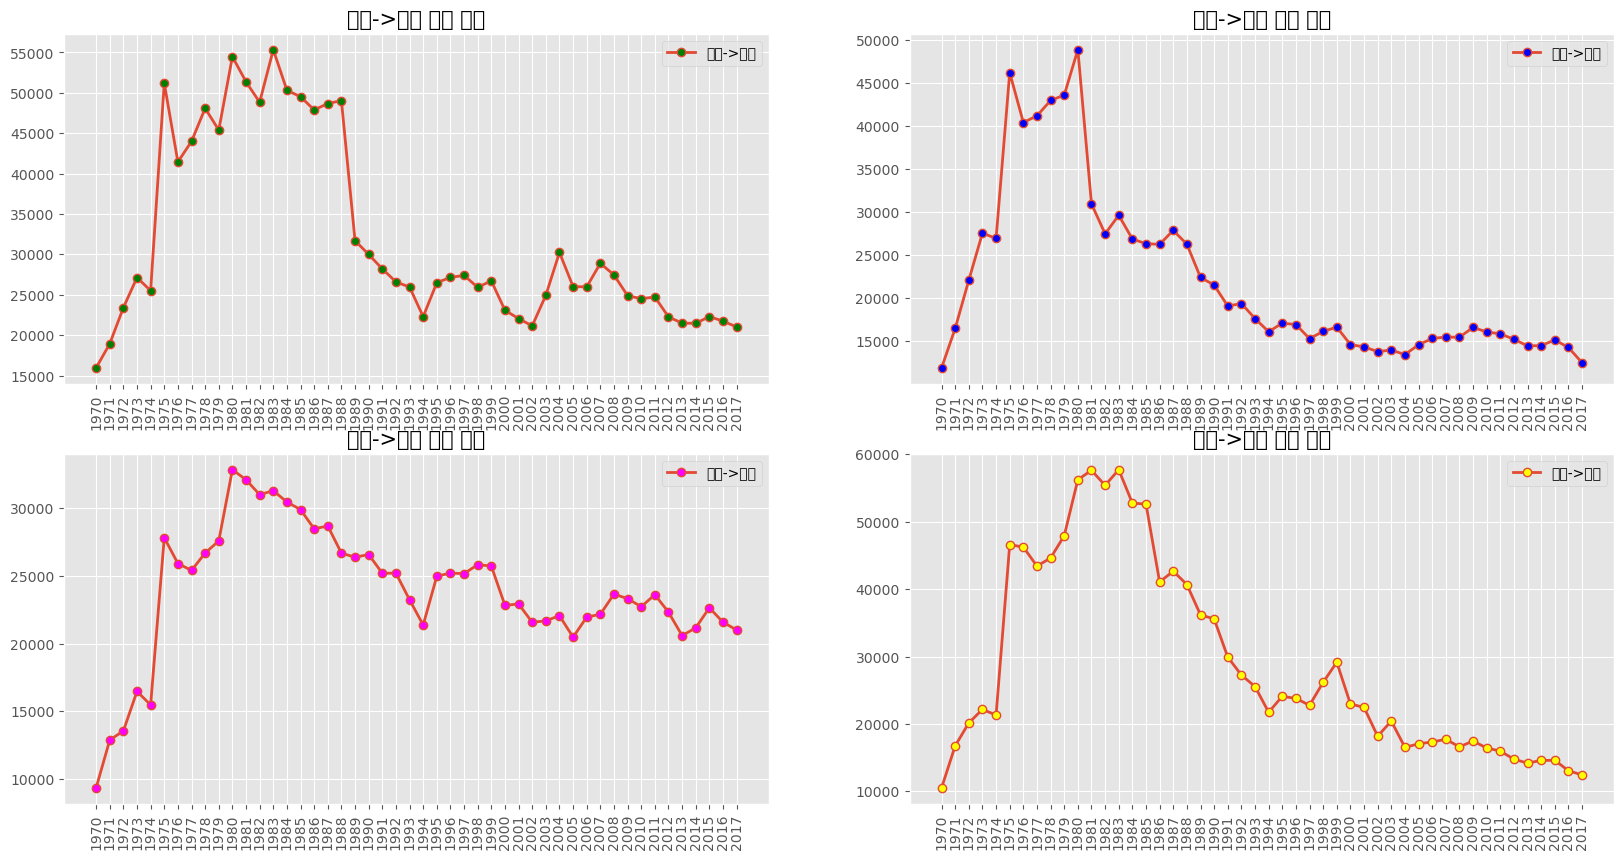

In [93]:
# P127
# 4개의 axe 객체에 각각 표시
# 서울에서 충남, 경북, 강원도, 전라남도로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'],col_years]
# 스타일 서식 지정
plt.style.use('ggplot')
# 그래프 객체 지정(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:],marker='o',
         markerfacecolor='green', linewidth=2, label='서울->충남')
ax2.plot(col_years, df_4.loc['경상북도',:],marker='o',
         markerfacecolor='blue', linewidth=2, label='서울->경북')
ax3.plot(col_years, df_4.loc['강원도',:],marker='o',
         markerfacecolor='magenta', linewidth=2, label='서울->강원')
ax4.plot(col_years, df_4.loc['전라남도',:],marker='o',
         markerfacecolor='yellow', linewidth=2, label='서울->전남')
# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트제목추가
ax1.set_title('서울->충남 인구 이동', size=15)
ax2.set_title('서울->경북 인구 이동', size=15)
ax3.set_title('서울->강원 인구 이동', size=15)
ax4.set_title('서울->전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

matplotlib에서 사용할 수 있는 색의 종류

In [36]:
import matplotlib
colors={}
for name, hex in matplotlib.colors.cnames.items() :
    colors[name] = hex
# 딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

C:\Users\gyw78\AppData\Local\Temp\ipykernel_20136\516559215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)


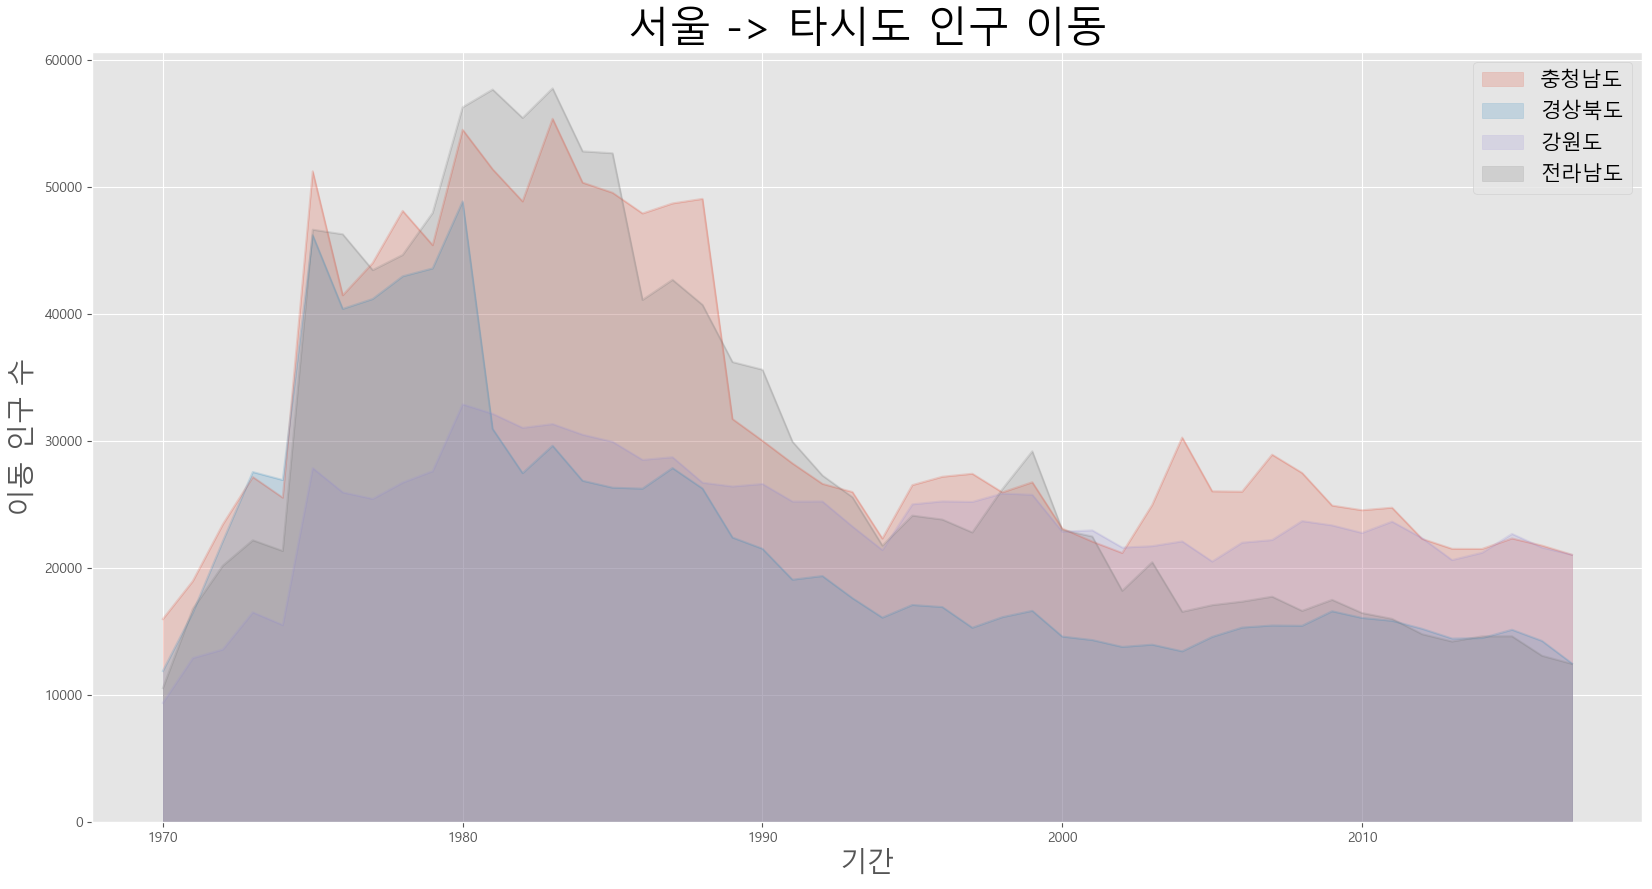

In [39]:
# 면적 그래프
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df[mask]
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
col_years = list(map(str, range(1970,2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'],col_years]
df_4 = df_4.transpose()
plt.style.use('ggplot')
df_4.index = df_4.index.map(int)
df_4.plot(kind='area', stacked = False, alpha=0.2, figsize =(20,10))
plt.title('서울 -> 타시도 인구 이동', size= 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

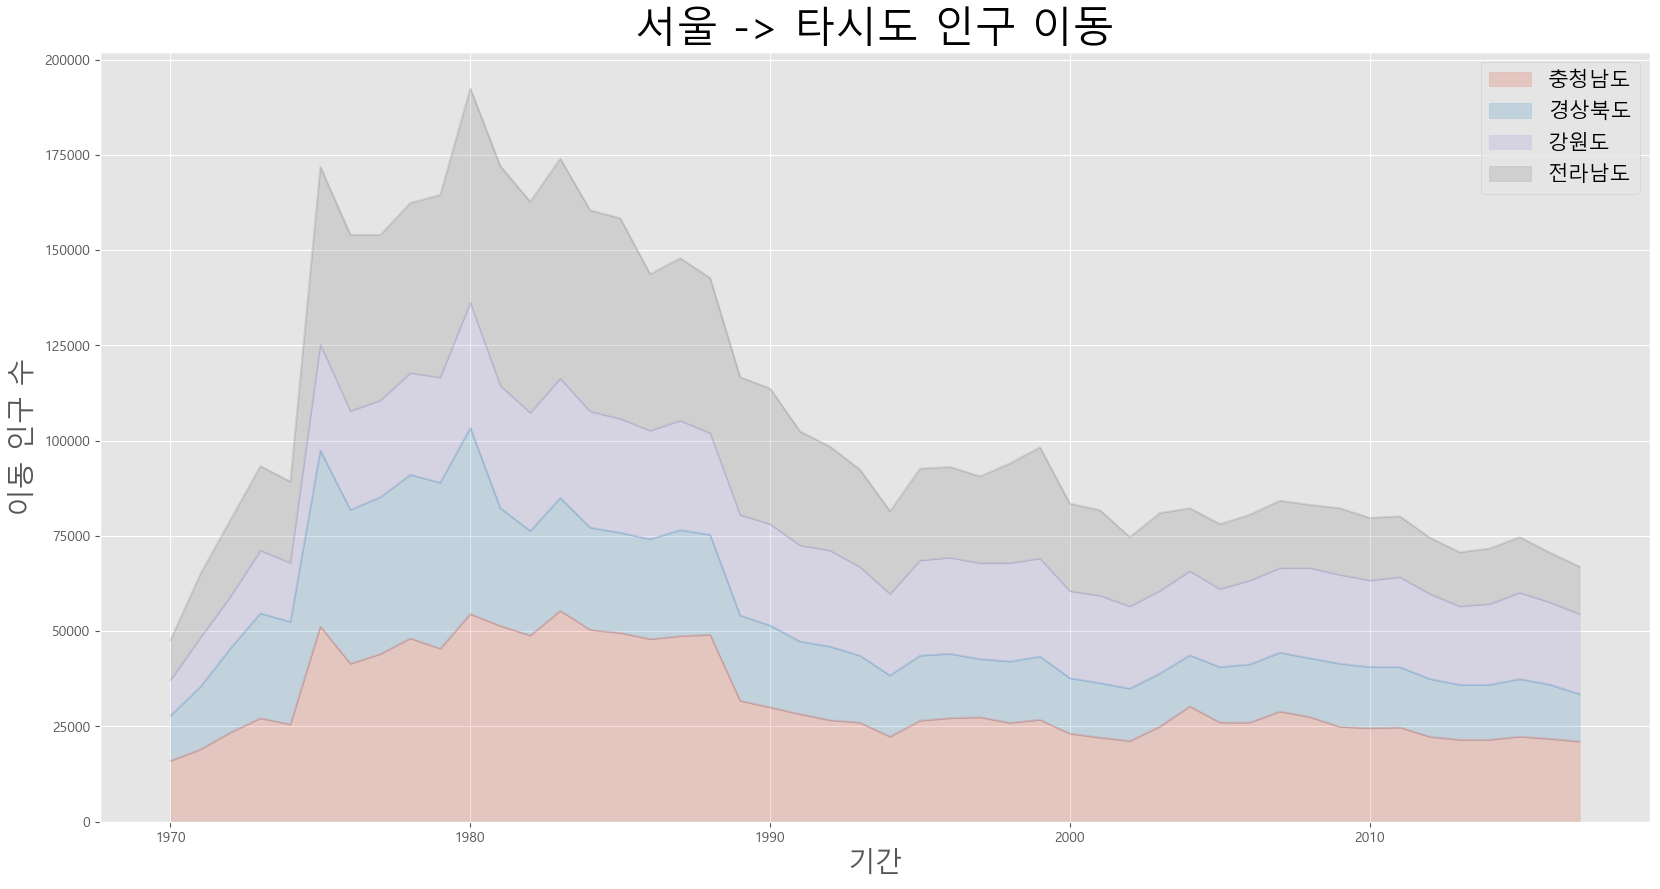

In [40]:
# 누적 면 그래프 (서로 겹치지 않고 데이터 누적)
df_4.index = df_4.index.map(int)
df_4.plot(kind='area', stacked = True, alpha=0.2, figsize =(20,10))
plt.title('서울 -> 타시도 인구 이동', size= 30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

<class 'matplotlib.axes._axes.Axes'>


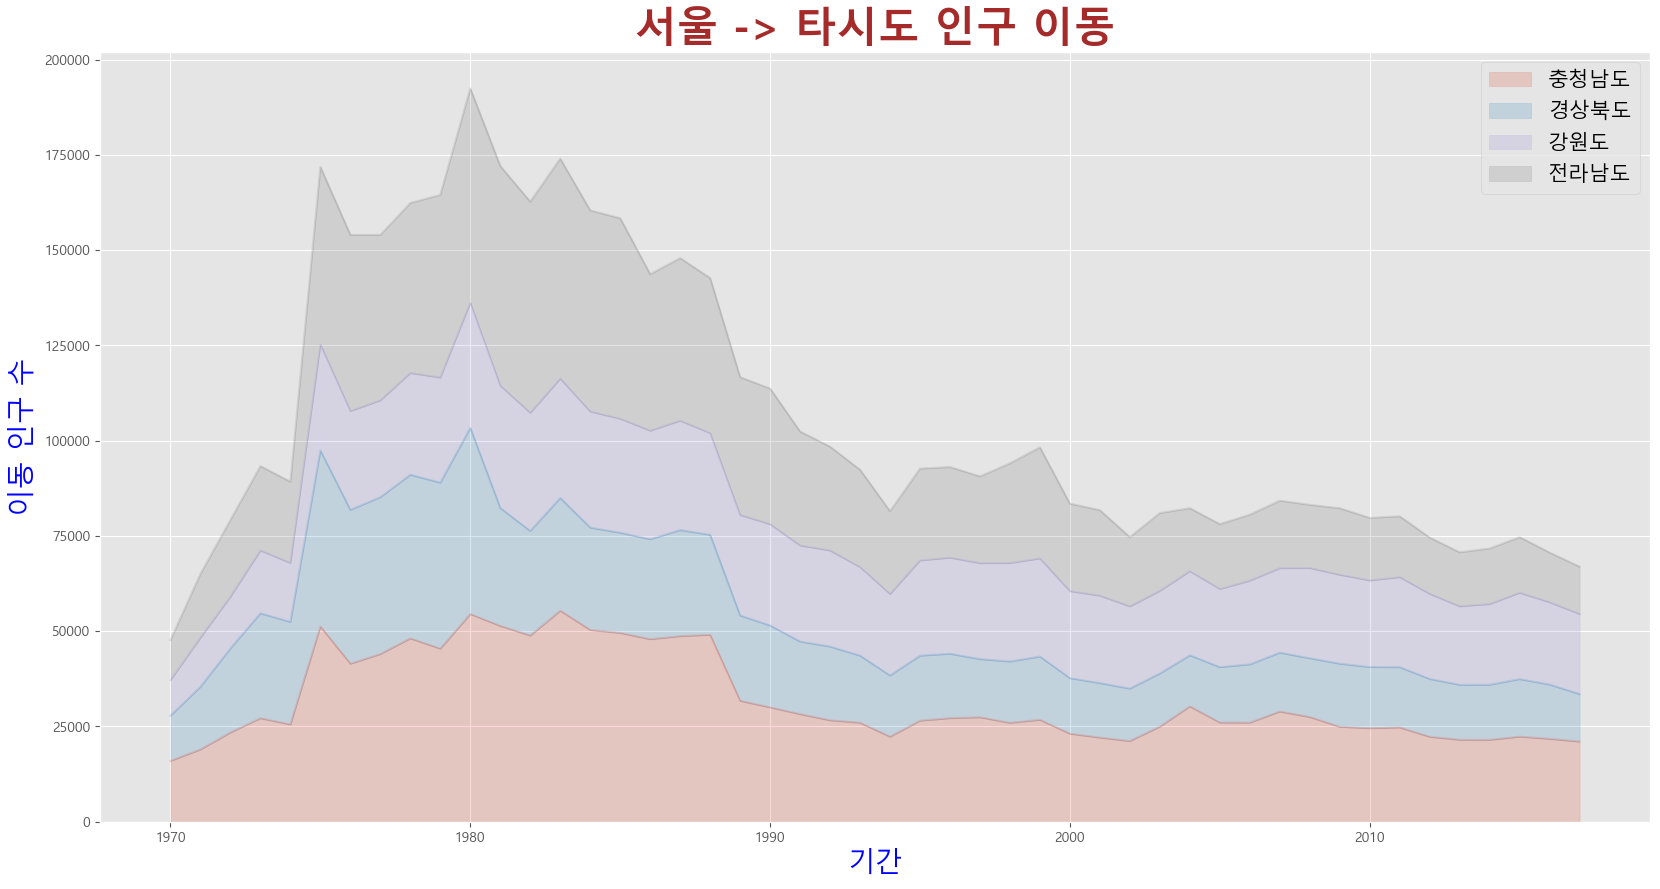

In [41]:
# axe 객체 속성 변경
df_4.index = df_4.index.map(int)
ax = df_4.plot(kind='area', stacked = True, alpha=0.2, figsize =(20,10))
print(type(ax))
# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size= 30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)
plt.show()

막대 그래프

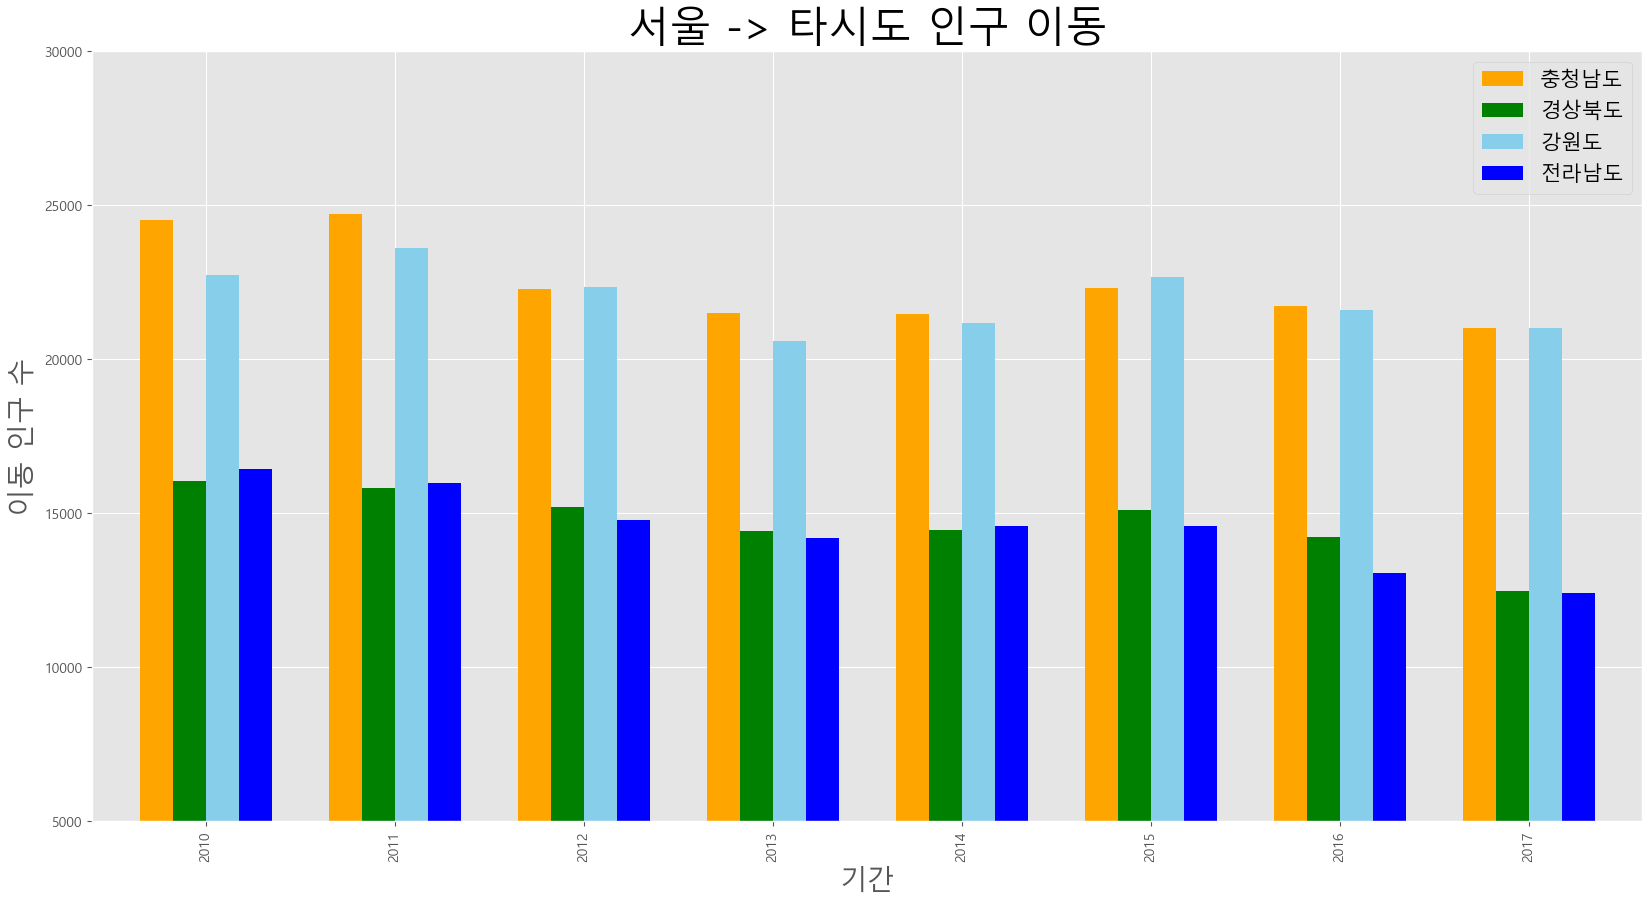

In [53]:
# 세로형 막대 그래프

col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'],col_years]
df_4 = df_4.transpose()
# 스타일 서식 지정
plt.style.use('ggplot')
# 데이터 프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize =(20,10), width = 0.7, 
         color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size= 30)
plt.ylabel('이동 인구 수', size=20)
plt.ylim(5000,30000)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)
plt.show()

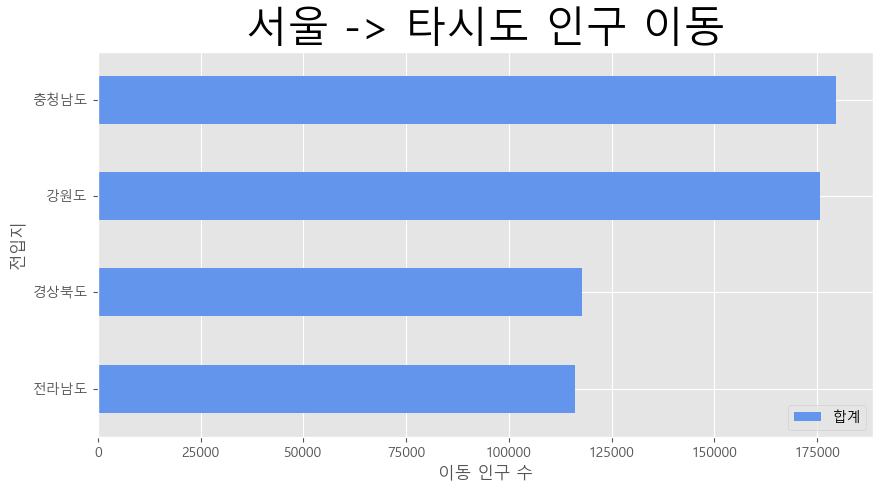

In [54]:
col_years = list(map(str, range(2010,2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'],col_years]

# 2010-2018 인구수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 수평 막대 그래프
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize =(10,5))

plt.title('서울 -> 타시도 인구 이동', size= 30)
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

보조 축 활용 (2축 그래프 그리기)

In [95]:
# 2축 그래프 그리기
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib 한글 폰트 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_excel("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/남북한발전전력량.xlsx",engine = 'openpyxl',
                  convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = (df(['총발전량']/df['총발전량 - 1년'])-1)*100

# 2축 그래프 그리기
ax1 = df[['수력', '화력']].plot(kind='bar', figsize = (20,10),
                            width=0.7, stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', 
         markersize=20, color='red', label='전년대비 증감률')
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량')
ax2.set_ylabel('전년 대비 증감률')

plt.title('북한 전력 발전량(1990-2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

TypeError: read_excel() got an unexpected keyword argument 'convert_float'

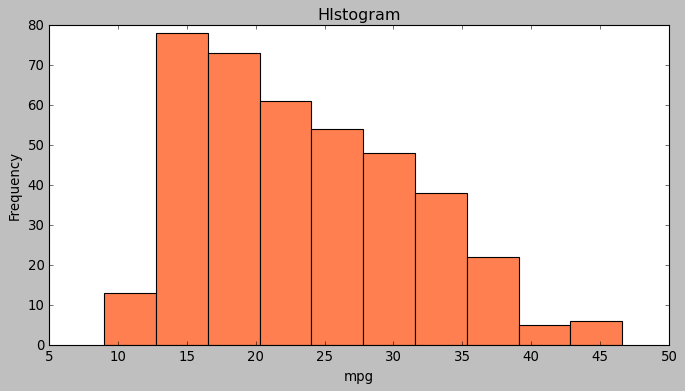

In [75]:
plt.style.use('classic') # 스타일 서식 지정
df = pd.read_csv("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/auto-mpg.csv",
                 header = None)
# 열 이름 지정 
df.columns = ['mpg', 'cylinders', 'displacement',
              'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']
# 연비[mpg] 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

# 그래프 꾸미기
plt.title('HIstogram')
plt.xlabel('mpg')
plt.show()

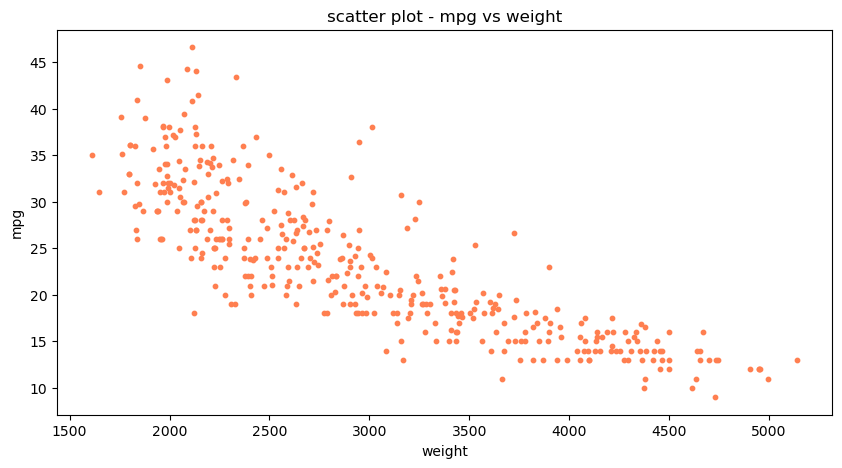

In [76]:
plt.style.use('default')

df = pd.read_csv("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/auto-mpg.csv",
                 header = None)
df.columns = ['mpg', 'cylinders', 'displacement',
              'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('scatter plot - mpg vs weight')
plt.show()

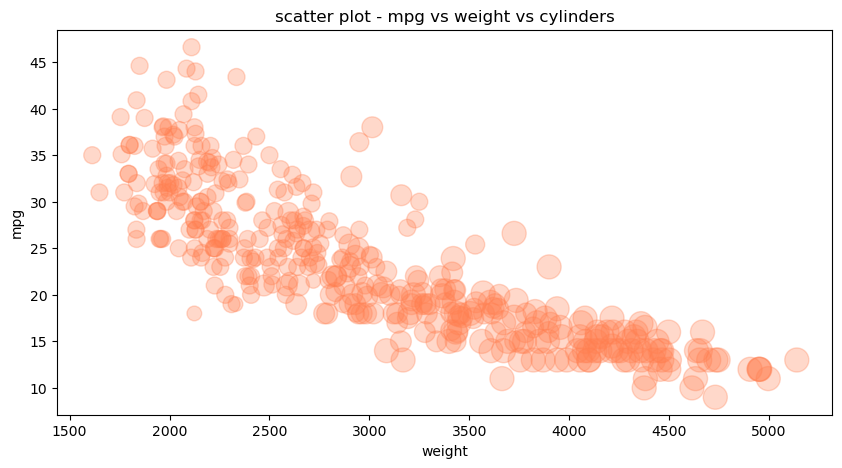

In [79]:
cylinders_size = df.cylinders/df.cylinders.max()*300
# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral',figsize=(10,5), s=cylinders_size, alpha=0.3)
plt.title('scatter plot - mpg vs weight vs cylinders')
plt.show()

그래프를 그림 파일로 저장

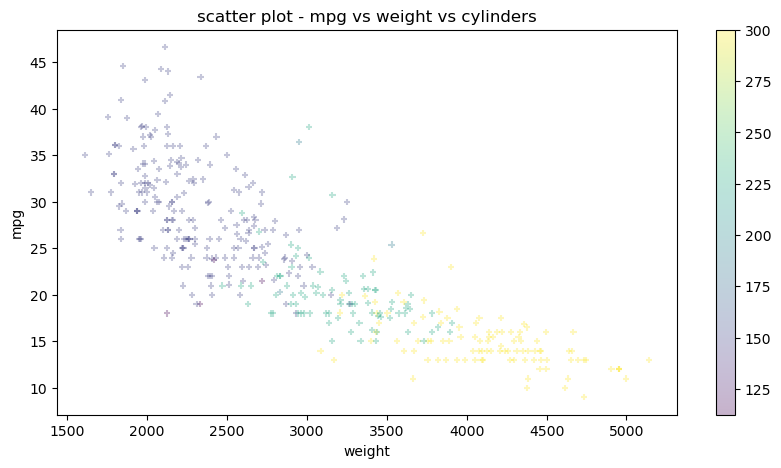

In [82]:
# 실린더 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max()*300
# 3개의 변수로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', marker='+',figsize=(10,5), 
        cmap='viridis', c=cylinders_size, alpha=0.3)
plt.title('scatter plot - mpg vs weight vs cylinders')

plt.savefig("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/scatter.png")
plt.savefig("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/scatter_transparent.png",
           transparent=True)

plt.show()

           mpg  cylinders  displacement  \
origin                                    
1       5000.8       1556       61229.5   
2       1952.4        291        7640.0   
3       2405.6        324        8114.0   

                                               horsepower    weight  \
origin                                                                
1       130.0165.0150.0150.0140.0198.0220.0215.0225.01...  837121.0   
2       46.0087.0090.0095.00113.090.0070.0076.0060.005...  169631.0   
3       95.0088.0088.0095.0065.0069.0095.0097.0092.009...  175477.0   

        acceleration  model year  \
origin                             
1             3743.4       18827   
2             1175.1        5307   
3             1277.6        6118   

                                                     name  count  
origin                                                            
1       chevrolet chevelle malibubuick skylark 320plym...    249  
2       volkswagen 1131 deluxe sedanpeugeot 50

TypeError: Legend.__init__() got an unexpected keyword argument 'lables'

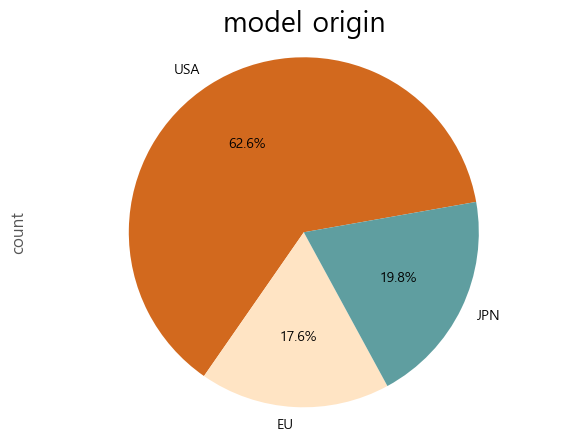

In [99]:
# p142
df = pd.read_csv("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/auto-mpg.csv",
                 header = None)
df.columns = ['mpg', 'cylinders', 'displacement',
              'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']
df.head()
# 데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

# 제조국가 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JPN']

# 제조국가 열에 대한 파이 차트 그리기 -> count열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct ='%1.1f%%',
                        startangle = 10,
                        colors=['chocolate','bisque','cadetblue'])

plt.title('model origin', size = 20)
plt.axis('equal')
plt.legend(lables=df_origin.index, loc='upper right')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1df50945450>,
 'caps': [<matplotlib.lines.Line2D at 0x1df50946910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df5091cb90>,
 'medians': [<matplotlib.lines.Line2D at 0x1df50947a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1df509503d0>,
 'means': []}

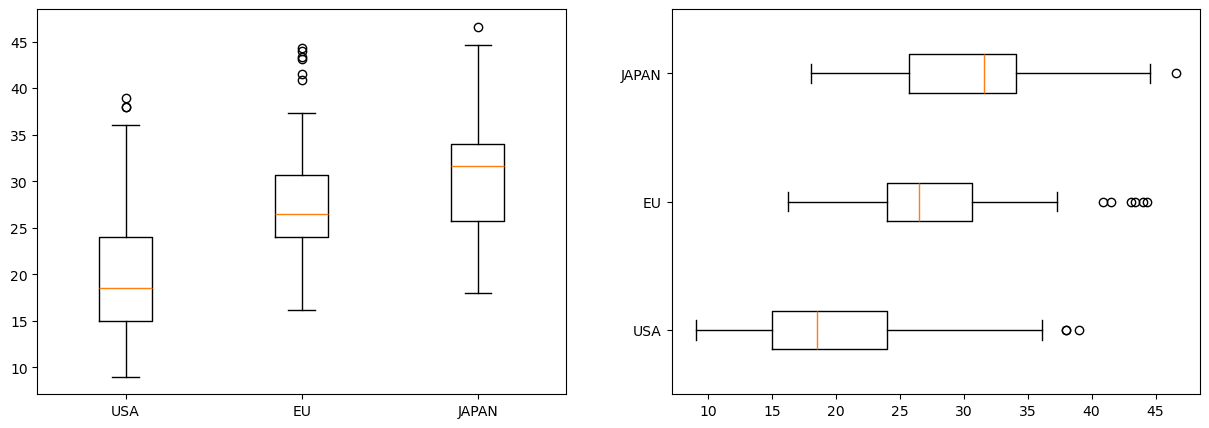

In [100]:
from matplotlib import font_manager, rc
font_path = "C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('default')
plt.rcParams['axes.unicode_minus']=False
df = pd.read_csv("C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/auto-mpg.csv",
                 header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
               labels = ['USA', 'EU', 'JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
               labels = ['USA', 'EU', 'JAPAN'],vert=False)
